In [1]:
import numpy as np
#np.random.seed(3245)

def brownianBride(k=10):
    #das hier y ist Wt = y
    y=np.random.normal(0,1)

    #Dictionary, in dem wir unsere generierten Werte speichern
    dic = {
        0:0,
        1:y
    }

    for i in range(1,k):
        print("=============="+str(i)+"=============")
        d=1
        # u nimmt 0 am Anfang und t ist 1
        u=0
        t=1
    
        # x wird für jede Schleife 0 nehmen  
        x=dic[0]
    
        # s der Mittelwert wird berechnet
        s=d/2**i
        print("u = "+str(u))
        print("s = "+str(d/2**i))
    
        b = 1/2**(i-1)
        sc = b
        while((d+1)!=2**i):
        
            d=d+2
            t=sc
            y = dic[t]
        
            print("y = "+str(y))
            print("x = "+str(x))
            print("t = {} and u = {}".format(t,u))
        
            dic[s]= np.random.normal(((t-s)*x+(s-u)*y)/(t-u),((s-u)*(t-s))/(t-u))
        
            x=y
            u=sc
        
            print("t = "+str(t))
            print("u = "+str(u))
        
            s=(d)/(2**i)
            sc=sc+b
        
            print("s = "+str(s))
            dic[s]=0
        
        t = 1
        y= dic[1]
        print("t = "+str(t))
        y=np.random.normal(((t-s)*x+(s-u)*y)/(t-u),((s-u)*(t-s))/(t-u))
        dic[s]=y
    return dic

In [2]:
def sort_dict(dic):
    myKeys = list(dic.keys())
    myKeys.sort()
    sorted_dict = {i: dic[i] for i in myKeys}
    return sorted_dict

==============1=============
u = 0
s = 0.5
t = 1
==============2=============
u = 0
s = 0.25
y = 1.2857547652574821
x = 0
t = 0.5 and u = 0
t = 0.5
u = 0.5
s = 0.75
t = 1
==============3=============
u = 0
s = 0.125
y = 0.5904711850867471
x = 0
t = 0.25 and u = 0
t = 0.25
u = 0.25
s = 0.375
y = 1.2857547652574821
x = 0.5904711850867471
t = 0.5 and u = 0.25
t = 0.5
u = 0.5
s = 0.625
y = 1.6805125404383772
x = 1.2857547652574821
t = 0.75 and u = 0.5
t = 0.75
u = 0.75
s = 0.875
t = 1
==============4=============
u = 0
s = 0.0625
y = 0.31864860153299807
x = 0
t = 0.125 and u = 0
t = 0.125
u = 0.125
s = 0.1875
y = 0.5904711850867471
x = 0.31864860153299807
t = 0.25 and u = 0.125
t = 0.25
u = 0.25
s = 0.3125
y = 0.9948119145959675
x = 0.5904711850867471
t = 0.375 and u = 0.25
t = 0.375
u = 0.375
s = 0.4375
y = 1.2857547652574821
x = 0.9948119145959675
t = 0.5 and u = 0.375
t = 0.5
u = 0.5
s = 0.5625
y = 1.4998065089969121
x = 1.2857547652574821
t = 0.625 and u = 0.5
t = 0.625
u = 0.625
s = 0

x = 0.759656117487778
t = 0.30078125 and u = 0.296875
t = 0.30078125
u = 0.30078125
s = 0.302734375
y = 0.7872309095018617
x = 0.7744296491797963
t = 0.3046875 and u = 0.30078125
t = 0.3046875
u = 0.3046875
s = 0.306640625
y = 0.8004225263310003
x = 0.7872309095018617
t = 0.30859375 and u = 0.3046875
t = 0.30859375
u = 0.30859375
s = 0.310546875
y = 0.8098468929664511
x = 0.8004225263310003
t = 0.3125 and u = 0.30859375
t = 0.3125
u = 0.3125
s = 0.314453125
y = 0.8212842939909114
x = 0.8098468929664511
t = 0.31640625 and u = 0.3125
t = 0.31640625
u = 0.31640625
s = 0.318359375
y = 0.8356480077236377
x = 0.8212842939909114
t = 0.3203125 and u = 0.31640625
t = 0.3203125
u = 0.3203125
s = 0.322265625
y = 0.8426614588151295
x = 0.8356480077236377
t = 0.32421875 and u = 0.3203125
t = 0.32421875
u = 0.32421875
s = 0.326171875
y = 0.8515126775539085
x = 0.8426614588151295
t = 0.328125 and u = 0.32421875
t = 0.328125
u = 0.328125
s = 0.330078125
y = 0.8539800017392726
x = 0.8515126775539085
t 

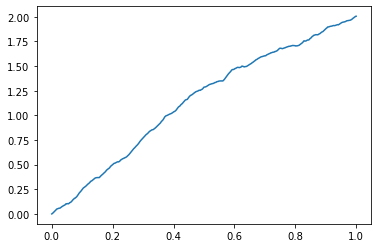

In [3]:
import matplotlib.pyplot as plt

dic=brownianBride()
sorted_dict = sort_dict(dic)
y = np.array(list(sorted_dict.values())).astype(float)
x = np.array(list(sorted_dict.keys())).astype(float)

plt.plot(x,y,'-')

In [11]:
def conditionalBrownianBridge(t,dic):
    '''
    Generates a conditional Brownian bridge at a given time point 't' based on a dictionary of values.
    
     Args:
         t (float): The target time point for generating the bridge.
         dic (dict): A dictionary containing key-value pairs representing time points and corresponding values.
    
     returns:
         dict: A sorted dictionary with the original values and the newly generated value at the target time point.
    '''
    nt = t
    list_dic = list(dic)
    
    # Find the nearest time point 'u' in the dictionary to the target time 't'
    u = min(list_dic, key=lambda k: abs(k-t))
    
    # If 'u' is the first or last time point, adjust 'u' until it is within the range
    if (u==1 or u>=nt):
        while(u>=nt):
            u=list_dic[list_dic.index(u)-1]
            
    # Get the next time point 't'
    t = list_dic[list_dic.index(u) + 1]
    
    # Calculate the midpoint 's'
    s = (t+u)/2
    
    # Get the values at 'u' and 't'
    x = dic[u]
    y = dic[t]
    
    # Generate a random value for the target time point 'nt' using a normal distribution
    dic[nt] = np.random.normal(((t-s)*x+(s-u)*y)/(t-u),((s-u)*(t-s))/(t-u))
    return sort_dict(dic)

dictionary = {
            0:0,
            1:0.468
}

print(conditionalBrownianBridge.__doc__)
np.random.seed(3245)
for i in range(8):
    u = np.random.uniform(0,1)
    print("unif="+str(u))
    dictionary = conditionalBrownianBridge(u,dictionary)
    print(dictionary.keys())
    #break;
print(dictionary.keys())


    Generates a conditional Brownian bridge at a given time point 't' based on a dictionary of values.
    
     Args:
         t (float): The target time point for generating the bridge.
         dic (dict): A dictionary containing key-value pairs representing time points and corresponding values.
    
     returns:
         dict: A sorted dictionary with the original values and the newly generated value at the target time point.
    
unif=0.0978843440930548
dict_keys([0, 0.0978843440930548, 1])
unif=0.20843554059248404
dict_keys([0, 0.0978843440930548, 0.20843554059248404, 1])
unif=0.05559150105678512
dict_keys([0, 0.05559150105678512, 0.0978843440930548, 0.20843554059248404, 1])
unif=0.29102699760436623
dict_keys([0, 0.05559150105678512, 0.0978843440930548, 0.20843554059248404, 0.29102699760436623, 1])
unif=0.818364539183212
dict_keys([0, 0.05559150105678512, 0.0978843440930548, 0.20843554059248404, 0.29102699760436623, 0.818364539183212, 1])
unif=0.08027139026934471
dict_keys([0, 

In [16]:
def trapezeint(array):
    n = len(array)
    a = 0
    b = 1
    h = (b-a)/n
    sumval = 0
    for i in range(1,n):
        sumval = sumval+2*array[i]
    sumval = h*(sumval+array[0]+array[-1])/2
    return sumval
trapezeint(y)

1.1465872763171039

In [17]:
sum(y)/len(y)

1.1446332255927625

In [32]:
np.random.seed(3245)
def montecarlo(m,dic):
    for i in range(m):
        x = np.random.uniform(0,1)
        dic=conditionalBrownianBridge(x,dic)
    return sum(dic.values())/m,dic

dictionar = {
        0:0,
        1:0.3824
    }
Mt, dicc = montecarlo(5,dictionar)
print(Mt)
trapezeint(list(dicc.values()))

0.10367295458639554


0.10136639613313966